In [1]:
import rasterio as rs
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from affine import Affine
from pyproj import Proj

seed = 100

streamRaster = "./data/CHI_poster/HRNHDPlusRasters1003/fac.tif"
with rs.open(streamRaster) as src:
    T0 = src.transform
    p1 = Proj(src.crs)
    stream = src.read(1)
    nd = src.nodata


dat = np.zeros_like(stream)
dat[stream > 1000] = 1

In [2]:
def generate_samples(run, number, stream):
    x,y = stream.shape
    stream = stream.reshape((x*y,1))
    
    ones = stream[stream == 1] # pull the stream pixels out
    
    np.random.seed = seed
    sampIDX = np.random.randint(0,len(ones)+1,number)
    
    ones[sampIDX] = 2 # turn the ones to twos 
    
    stream[stream==1] = ones # insert back into full array
    
    stream = stream.reshape((x,y))
    
    x,y = np.where(stream == 2)
    
    # now convert these index values to coordinates
    T1 = T0 * Affine.translation(0.5,0.5) #corner to cell center

    rc2en = lambda r,c: (c,r) * T1

    easting, northing = np.vectorize(rc2en, otypes = [np.float, np.float])(x,y)
    
    geometry = []
    for east,north in zip(easting,northing):
        geometry.append(Point(east,north))
        
    sample = gpd.GeoDataFrame(geometry=geometry,crs = p1.srs)
    print(len(sample))
    
    sample['idx'] = np.arange(1,number+1) + run * 1000
    
    sample.to_file("./data/CHI_poster/sample_locs_%s.shp"%run)
    del stream
    print("Sample %s done!"%run)
    

In [12]:
samples = []
for i in range(20):
    i += 1
    generate_samples(i,i*10,dat.copy())
    samples.append(i*10)

10
Sample 1 done!
20
Sample 2 done!
30
Sample 3 done!
40
Sample 4 done!
50
Sample 5 done!
60
Sample 6 done!
70
Sample 7 done!
80
Sample 8 done!
90
Sample 9 done!
100
Sample 10 done!
110
Sample 11 done!
120
Sample 12 done!
130
Sample 13 done!
140
Sample 14 done!
150
Sample 15 done!
160
Sample 16 done!
170
Sample 17 done!
180
Sample 18 done!
190
Sample 19 done!
200
Sample 20 done!


In [39]:
streamRaster = "./data/CHI_poster/stream.tif"
with rs.open(streamRaster) as src:
    T0 = src.transform
    p1 = Proj(src.crs)
    stream = src.read(1)
    nd = src.nodata

In [40]:
x,y = stream.shape
stream = stream.reshape((x*y,1))

In [41]:
ones = stream[stream == 1] # pull the stream pixels out

In [42]:
np.random.seed = seed
sampIDX = np.random.randint(0,len(ones)+1,samples)

In [43]:
ones[sampIDX] = 2 # turn the ones to twos 

In [44]:
stream[stream==1] = ones # insert back into full array

In [45]:
stream = stream.reshape((x,y))

In [46]:
x,y = np.where(stream == 2)

In [47]:
# now convert these index values to coordinates
T1 = T0 * Affine.translation(0.5,0.5) #corner to cell center

rc2en = lambda r,c: (c,r) * T1

easting, northing = np.vectorize(rc2en, otypes = [np.float, np.float])(x,y)

In [48]:
geometry = []
for east,north in zip(easting,northing):
    geometry.append(Point(east,north))

In [54]:
sample = gpd.GeoDataFrame(geometry=geometry,crs = p1.srs)

In [59]:
sample['idx'] = np.arange(1,len(sample)+1)

In [60]:
sample.head()

,geometry,idx
0,POINT (-1207160 2991100),1
1,POINT (-1212300 2989510),2
2,POINT (-1207080 2988330),3
3,POINT (-1209780 2987840),4
4,POINT (-1213260 2987520),5


In [61]:
sample.to_file("./data/CHI_poster/sample_locs.shp")

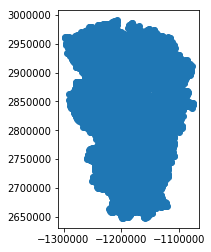

In [56]:
sample.plot()

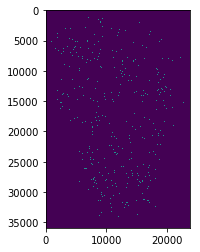

In [57]:
plt.imshow(stream)